<a href="https://colab.research.google.com/github/Biel-PS/AdvancedFluidMechanics/blob/BielPS/2-Rheology/Assignment2finish.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 2. Rheological behaviour of cosmetic creams

It is a sample of rheological behaviour of some cosmetic creams, taken from [here](https://www.rheologylab.com/articles/emulsion-stability/)

![image.png](https://github.com/Biel-PS/AdvancedFluidMechanics/blob/main/2-Rheology/CSVP-of-Lotions-and-Creams-names-removed.webp?raw=1)

What conclusions would you get from that about the behaviour of day creams in front of body creams?

Let's consider the case of the body lotion C. Fit the Power Law model, get coefficients and plot it. You will see that it is not good. You will see that it does not agree with very low (_zero-shear rate viscosity_) or high (_infinity-shear rate viscosity_) shear stress. There are some other models that deals with this behaviour. The molt usual is the [Carreau model](https://en.wikipedia.org/wiki/Carreau_fluid). Apply this law to obtain a more accurate model of this fluid and discuss it.


# SOLUTION

In first place we have to import all necessary libraries for the mission.

Then, we continue defining the variables and functions needed in order to assemble the equations.


In [47]:
import statsmodels.formula.api as smf
import statsmodels.graphics.api as smg
import patsy
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sympy as sp
import statsmodels.api as sm
sp.init_printing()
from IPython.display import display, Math
Deltap,L,r,n,R, sig, eta,gamma,K= sp.symbols('{\Delta}p L r n R sigma eta gamma K',positive=True)
uz = sp.Function('u_z')



eq1 = sp.Eq(gamma,sig/eta)
eq2 = sp.Eq(sig,K*gamma**n)

Eq = eq2.subs(gamma,eq1.rhs)

Eq= sp.solve([Eq],[sig])

expression = sp.Eq(sig,Eq[0][0])

display(expression)

exprLog = sp.Eq(sp.log(expression.lhs),sp.log(expression.rhs))
exprLog = exprLog.expand(force=True)
display(exprLog)

A,B = sp.symbols('A B',positive=True)

Aeq = n/(n-1)
Beq = -sp.log(K)/(n-1)

logExpr = sp.Eq(sp.log(sig), A*(sp.log(eta)) + B)

display(logExpr)

      -1      n  
     ─────  ─────
     n - 1  n - 1
σ = K     ⋅η     

         n⋅log(η)   log(K)
log(σ) = ──────── - ──────
          n - 1     n - 1 

log(σ) = A⋅log(η) + B

Solving the equations and comparing to a linear model, we find the relations  $A = n/(n-1)$ and $B=log(K)/(n-1)$

To compare the data of the lotion cream it has to be added first:

In [48]:
DataFrame = pd.read_csv("Default Dataset (1).csv",header=None,names=['x','y'], delimiter=";", decimal=",")


model = smf.ols('np.log(y) ~ np.log(x)', DataFrame)  # 1. Define model of regression
result = model.fit()                   # 2. Adjust model of the data
result.summary()
display(result.params)

,0
Intercept,11.645259
np.log(x),-2.599834


With the regression made, we get both values from *statsmodels* and with given values we can plot the result.

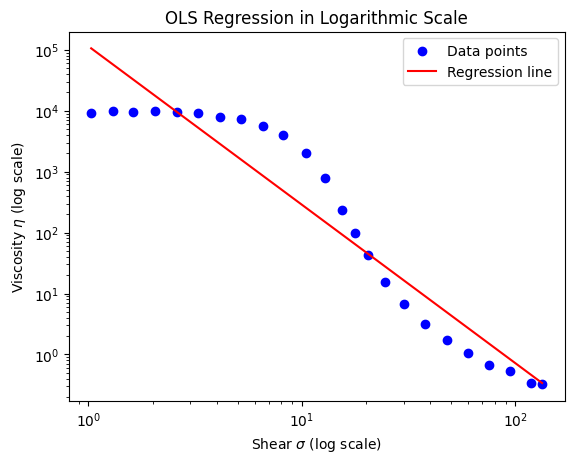

In [49]:
intercept = result.params['Intercept']
slope = result.params['np.log(x)']

# Create a range of x values (log-transformed) for plotting the regression line in logarithmic space
x_vals = DataFrame['x']  # Use the original x values for plotting the regression line in the original scale

# Compute the y-values for the regression line in logarithmic space
y_vals_log = intercept + slope * np.log(x_vals)  # Regression line equation in log scale

# Convert the y-values back to the original scale using np.exp() for the plot
y_vals = np.exp(y_vals_log)

# Plot the data points (log-transformed)
plt.scatter(DataFrame['x'], DataFrame['y'], color='blue', label='Data points')

# Plot the regression line (on the original scale)
plt.plot(x_vals, y_vals, color='red', label='Regression line')

# Set logarithmic scale for both axes
plt.xscale('log')
plt.yscale('log')

# Adding labels and title
plt.xlabel('Shear $\sigma$ (log scale)')
plt.ylabel('Viscosity $\eta$ (log scale)')
plt.title('OLS Regression in Logarithmic Scale')

# Show legend
plt.legend()

# Display the plot
plt.show()

It's not good, as expected, because the shape of the curve doesn't fit in any point of it.

However, the results of the "n" and "K" vales are the following

In [50]:
Aeq = n/(n-1)
Beq = -sp.log(K)/(n-1)

nVal = sp.solve(sp.Eq(Aeq , slope),n)
Beq = Beq.subs(n,nVal[0])
KVal = sp.solve(sp.Eq(Beq , intercept),K)

Aeq = Aeq.subs({n:nVal[0], K: KVal[0]})
Beq = Beq.subs({n:nVal[0], K: KVal[0]})

LinearModel = logExpr.subs({A:Aeq, B: Beq})
display("Value of n: " + str(nVal))
display("Value of K: " + str(KVal))

display(LinearModel)


'Value of n: [0.722209379716925]'

'Value of K: [25.4049418030719]'

log(σ) = 11.6452589759146 - 2.59983356882596⋅log(η)

Now we define the Carreau model

Definition of the symbols and accomodation of the equation to work with.

In [60]:
eta, etaInf, eta0, lam,gamma, n= sp.symbols('eta \eta_{inf} eta_0 lambda gamma n',positive=True)

eq1 = sp.Eq(eta, etaInf + (eta0-etaInf)*(1+(lam*gamma)**2)**((n-1)/2))
display(eq1)

eq2 = sp.Eq(gamma,sp.solve(sp.Eq(sig,K*gamma**n),gamma)[0])
display(eq2)

subs = eq1.subs(gamma,eq2.rhs)
Eq = subs
display(Eq)


                                               n   1
                                               ─ - ─
                                               2   2
                                    ⎛ 2  2    ⎞     
η = \eta_{inf} + (-\eta_{inf} + η₀)⋅⎝γ ⋅λ  + 1⎠     

        ___
       ╱ σ 
γ = n ╱  ─ 
    ╲╱   K 

                                                 n   1
                                                 ─ - ─
                                                 2   2
                                    ⎛      2    ⎞     
                                    ⎜      ─    ⎟     
                                    ⎜      n    ⎟     
                                    ⎜ 2 ⎛σ⎞     ⎟     
η = \eta_{inf} + (-\eta_{inf} + η₀)⋅⎜λ ⋅⎜─⎟  + 1⎟     
                                    ⎝   ⎝K⎠     ⎠     

Import the optimizing library and define carreau viscosity model, initial conditions and bounds.

In order to use scipy.optimize we defined the model of the function to guide the algorithm with the experimental data we had, and the result we wantes, defined by Carreau.

Optimal parameters:
  η₀ = 9171.372158712393
  η∞ = 0.29999999999999993
  λ  = 98.83778887655698
  n  = 0.19999999999999998
  K  = 15.5313987357654


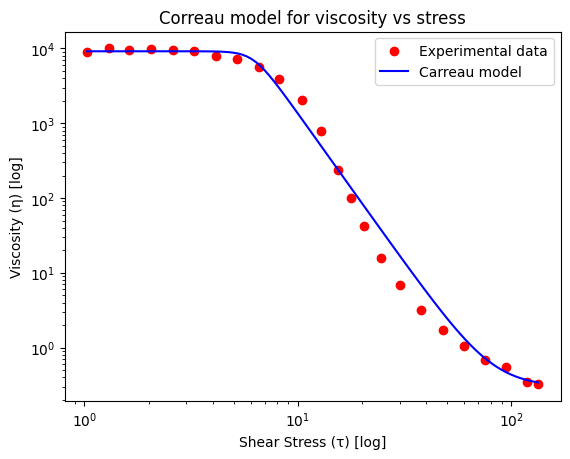

In [63]:
import scipy.optimize as opt

#definition of the model as a function
def carreau_viscosity(tau, eta0, etainf, lambda_, n,k):
  eta_tau = etainf + (eta0-etainf)*(1+lambda_**2*(tau/k)**(2/n))**((n-1)/2)
  return eta_tau

#conversion from dataframe to data
etaexp = DataFrame['y'].to_numpy()
tauexp = DataFrame['x'].to_numpy()

#Initial guess
p0 =[9300,0.3,100,0.01,5]#[eta0, etainf, lambda, n, k]

#Bondary limits
bounds = (
    [7000, 0, 0, 0, 0],  # Min value for parameters
    [10000, 0.3, 150, 0.2, 25]  # Max value for parameters
)

popt, pcov = opt.curve_fit(carreau_viscosity, tauexp, etaexp, p0, bounds = bounds, maxfev=10000)

eta0_fit, etainf_fit, lambda_fit, n_fit, K_fit = popt
print(f"Optimal parameters:")
print(f"  η₀ = {eta0_fit}")
print(f"  η∞ = {etainf_fit}")
print(f"  λ  = {lambda_fit}")
print(f"  n  = {n_fit}")
print(f"  K  = {K_fit}")

#Creation of shear values
tau_fit = np.logspace(np.log10(min(tauexp)), np.log10(max(tauexp)), 100)
#Evaluation of viscosity values with optimized parametres
eta_fit = carreau_viscosity(tau_fit, *popt)

#Plot of the results
plt.scatter(tauexp, etaexp, label="Experimental data", color="red")
plt.plot(tau_fit, eta_fit, label="Carreau model", color="blue")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Shear Stress (τ) [log]")
plt.ylabel("Viscosity (η) [log]")
plt.legend()
plt.title("Correau model for viscosity vs stress")
plt.show()

We can see that after implementing Carreau's model the plot assimilated strongly better than the linear approximation with power law model od fluid.